#### 1.Download the data from the above link. How many ".csv" files are available in the dataset?

In [ ]:
# 4

#### 2.What is the shape of "movies.csv"?

In [2]:
import pandas as pd
movies_df = pd.read_csv("movies.csv")
movies_df.shape

(9742, 3)

#### 3.What is the shape of "ratings.csv"?

In [3]:
import pandas as pd
rating_df = pd.read_csv("ratings.csv")
rating_df.shape

(100836, 4)

#### 4.How many unique "userId" are available in "ratings.csv"?

In [4]:
rating_df['userId'].nunique()

610

#### 5.Which movie has recieved maximum number of user ratings?

In [5]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
rating_movie = pd.merge(movies_df,rating_df, how = 'inner', on = ['movieId'])

In [7]:
rating_movie.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [8]:
#method -1
rating_movie.groupby('title')['rating'].count().idxmax()

'Forrest Gump (1994)'

In [9]:
#method - 2
rating_movie.groupby("title")["rating"].count().sort_values(ascending = False)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

#### 6.Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [10]:
import pandas as pd
tags_df = pd.read_csv("tags.csv")
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [11]:
tag = pd.merge(movies_df,tags_df, how = 'inner', on = ['movieId'])

In [12]:
tag.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


In [13]:
tag.loc[tag['title'] == "Matrix, The (1999)"]['tag'].unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

#### 7.What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [15]:
group = rating_movie.groupby('title')['rating'].mean()

In [16]:
group["Terminator 2: Judgment Day (1991)"]

3.970982142857143

#### 8.How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

<AxesSubplot:xlabel='rating', ylabel='Count'>

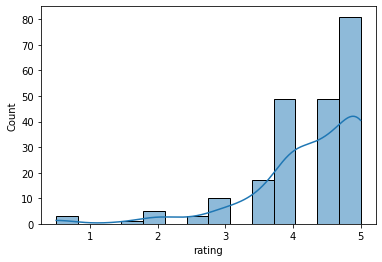

In [17]:
import seaborn as sns
sns.histplot(data = rating_movie[rating_movie['title'] == 'Fight Club (1999)']['rating'],kde=True)

🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

#### Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.

In [18]:
grouped_ratings = rating_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

In [19]:
grouped_ratings

,movieId,rating_count,rating_mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


#### Apply inner join on dataframe created from movies.csv and the grouped df from step 1.

In [20]:
merged_df = pd.merge(movies_df,grouped_ratings,how='inner',on=['movieId'])

In [21]:
merged_df.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429


#### Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [22]:
merged_count = merged_df[merged_df['rating_count'] > 50]

In [23]:
merged_count

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


#### 9. Which movie is the most popular based on  average user ratings?
*
Answer this question only after applying the above mentioned "Mandatory Operration".

In [24]:
merged_count.loc[merged_count['rating_mean'].idxmax()]

movieId                                      318
title           Shawshank Redemption, The (1994)
genres                               Crime|Drama
rating_count                                 317
rating_mean                             4.429022
Name: 277, dtype: object

#### 10. Select all the correct options which comes under top 5 popular movies based on number of user ratings.
*
Answer this question only after applying the above mentioned "Mandatory Operration".

In [25]:
merged_count.sort_values(by='rating_count', ascending=False).head(5)

,movieId,title,genres,rating_count,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


#### 11. Which Sci-Fi movie is "third most popular" based on the number of user ratings?
*
Answer this question only after applying the above mentioned "Mandatory Operration".

In [26]:
scifi = merged_count[merged_count['genres'].str.contains('Sci-Fi')]

In [114]:
scifi.head()

,movieId,title,genres,rating_count,rating_mean
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051
133,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
176,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043


In [27]:
scifi.sort_values(by='rating_count', ascending=False).head(3)

,movieId,title,genres,rating_count,rating_mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000


🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.

In [28]:
merged_count.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [29]:
link_df = pd.read_csv("links.csv")
link_df

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [30]:
final_df = pd.merge(merged_count,link_df,how='inner',on=['movieId'])

In [31]:
final_df

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [150]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

ratings = []
for i in list(final_df['imdbId']):
    ratings.append(scrapper(i))

In [164]:
final_df['ratings'] = ratings

In [167]:
final_df

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.6
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,8.2
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,8.1
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0


#### 12 Mention the movieId of the movie which has the highest IMDB rating.


In [166]:
final_df.sort_values(by='ratings',ascending=False)

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,ratings
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0,9.3
117,858,"Godfather, The (1972)",Crime|Drama,192,4.289062,68646,238.0,9.2
146,1203,12 Angry Men (1957),Drama,57,4.149123,50083,389.0,9.0
364,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185,4.118919,167260,122.0,9.0
156,1221,"Godfather: Part II, The (1974)",Crime|Drama,129,4.259690,71562,240.0,9.0
...,...,...,...,...,...,...,...,...
70,420,Beverly Hills Cop III (1994),Action|Comedy|Crime|Thriller,59,2.720339,109254,306.0,5.5
28,153,Batman Forever (1995),Action|Adventure|Comedy|Crime,137,2.916058,112462,414.0,5.4
73,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635,106598,9612.0,5.4
30,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193,112715,10329.0,5.3


#### 13 Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [169]:
rating = final_df[final_df['genres'].str.contains('Sci-Fi')]

In [172]:
rating.sort_values(by='ratings',ascending=False)

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,ratings
424,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,1375666,27205.0,8.8
248,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,133093,603.0,8.7
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
140,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640,80684,1891.0,8.7
44,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076,76759,11.0,8.6
...,...,...,...,...,...,...,...,...
36,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355,113492,9482.0,5.6
35,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,113481,9886.0,5.6
73,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635,106598,9612.0,5.4
30,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193,112715,10329.0,5.3
